<a href="https://colab.research.google.com/github/shubham953/OLA-EDA-Ensemble-Learning-Random-Forest-Hyperparameter-Tunning/blob/main/Ola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OLA - Ensemble Learning**

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

Demographics (city, age, gender etc.)
Tenure information (joining date, Last Date)
Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

Column Profiling:

MMMM-YY : Reporting Date (Monthly)


Driver_ID : Unique id for drivers

Age : Age of the driver

Gender : Gender of the driver – Male : 0, Female: 1

City : City Code of the driver

Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate

Income : Monthly average Income of the driver

Date Of Joining : Joining date for the driver

LastWorkingDate : Last date of working for the driver

Joining Designation : Designation of the driver at the time of joining

Grade : Grade of the driver at the time of reporting

Total Business Value : The total business value acquired by the driver in a
month (negative business indicates cancellation/refund or car EMI adjustments)

Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

In [1]:

import os
import random
 #For dealing with tables
import pandas as pd
 #For dealing with linear algebra
import numpy as np
 #For data visualization and plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
 #For minmaxscaler
from sklearn.preprocessing import MinMaxScaler
 #For shapiro test
from scipy.stats import shapiro
 #For train-test split
from sklearn.model_selection import train_test_split,GridSearchCV
 #For RandomForest
from sklearn.ensemble import RandomForestClassifier
 #Accuracy score, confusion matrix, classification report, ROC curve, AUC
from sklearn.metrics import f1_score
 #To ignore warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
df = pd.read_csv("ola_driver_scaler.csv")

In [3]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [6]:
 ##Converting 'MMM-YY' feature to datetime type
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
 ##Converting 'Dateofjoining' feature to datetime type
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
 ##Converting 'LastWorkingDate' feature to datetime type
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

#Impute Missing Values

In [82]:
df_nums=df.select_dtypes(np.number)
df_nums.drop(columns='Driver_ID',inplace=True)
columns=df_nums.columns

In [83]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df_new = imputer.fit_transform(df_nums)

In [84]:
df_new=pd.DataFrame(df_new)
df_new.columns=columns

In [85]:
df_new.isnull().sum()

Age                     0
Gender                  0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
dtype: int64

#Getting the remaining columns back

In [86]:
remaining_columns=list(set(df.columns).difference(set(columns)))

In [87]:
data=pd.concat([df_new, df[remaining_columns]],axis=1)

In [88]:
data.head()

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Driver_ID,LastWorkingDate,Dateofjoining,City,MMM-YY
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,1,NaT,2018-12-24,C23,2019-01-01
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,1,NaT,2018-12-24,C23,2019-02-01
2,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,1,2019-03-11,2018-12-24,C23,2019-03-01
3,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2,NaT,2020-11-06,C7,2020-11-01
4,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2,NaT,2020-11-06,C7,2020-12-01


#Aggregation at driver and month level

In [89]:
function_dict = {'Age':'max', 'Gender':'first','City':'first',
                 'Education_Level':'last', 'Income':'last',
                 'Joining Designation':'last','Grade':'last',
                 'Dateofjoining':'last','LastWorkingDate':'last',
                 'Total Business Value':'sum','Quarterly Rating':'last'}
new_train=data.groupby(['Driver_ID','MMM-YY']).aggregate(function_dict)

In [90]:
df_new_train=new_train.sort_values(by=['Driver_ID','MMM-YY'] ,ascending=[True,True])

In [91]:
df_new_train.reset_index(inplace=True)

In [92]:
df_new_train

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Dateofjoining,LastWorkingDate,Total Business Value,Quarterly Rating
0,1,2019-01-01,28.0,0.0,C23,2.0,57387.0,1.0,1.0,2018-12-24,NaT,2381060.0,2.0
1,1,2019-02-01,28.0,0.0,C23,2.0,57387.0,1.0,1.0,2018-12-24,NaT,-665480.0,2.0
2,1,2019-03-01,28.0,0.0,C23,2.0,57387.0,1.0,1.0,2018-12-24,2019-03-11,0.0,2.0
3,2,2020-11-01,31.0,0.0,C7,2.0,67016.0,2.0,2.0,2020-11-06,NaT,0.0,1.0
4,2,2020-12-01,31.0,0.0,C7,2.0,67016.0,2.0,2.0,2020-11-06,NaT,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2788,2020-08-01,30.0,0.0,C27,2.0,70254.0,2.0,2.0,2020-06-08,NaT,740280.0,3.0
19100,2788,2020-09-01,30.0,0.0,C27,2.0,70254.0,2.0,2.0,2020-06-08,NaT,448370.0,3.0
19101,2788,2020-10-01,30.0,0.0,C27,2.0,70254.0,2.0,2.0,2020-06-08,NaT,0.0,2.0
19102,2788,2020-11-01,30.0,0.0,C27,2.0,70254.0,2.0,2.0,2020-06-08,NaT,200420.0,2.0


In [93]:
df1=pd.DataFrame()

In [94]:
df1['Driver_ID']=df_new_train['Driver_ID'].unique()#in aggrigation it will be unique


In [95]:
df_new_train.columns

Index(['Driver_ID', 'MMM-YY', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Joining Designation', 'Grade', 'Dateofjoining',
       'LastWorkingDate', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

#Aggregation at Driver Level

In [96]:
df1['Age'] = list(df_new_train.groupby('Driver_ID',axis=0).max('MMM-YY')['Age'])
df1['Gender'] = list(df_new_train.groupby('Driver_ID').agg({'Gender':'last'})['Gender'])
df1['City'] = list(df_new_train.groupby('Driver_ID').agg({'City':'last'})['City'])
df1['Education'] = list(df_new_train.groupby('Driver_ID').agg({'Education_Level':'last'})['Education_Level'])
df1['Income'] = list(df_new_train.groupby('Driver_ID').agg({'Income':'last'})['Income'])
df1['Joining_Designation'] = list(df_new_train.groupby('Driver_ID').agg({'Joining Designation':'first'})['Joining Designation'])
df1['Grade'] = list(df_new_train.groupby('Driver_ID').agg({'Grade':'last'})['Grade'])
df1['Total_Business_Value'] = list(df_new_train.groupby('Driver_ID').agg({'Total Business Value':'sum'})['Total Business Value'])
df1['Last_Quarterly_Rating'] = list(df_new_train.groupby('Driver_ID').agg({'Quarterly Rating':'last'})['Quarterly Rating'])

In [97]:
df1.head()

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0


# Creating a column which tells if the quarterly rating has increased for that employee for those whose quarterly rating has increased we assign the value 1

In [98]:
#Quarterly rating at the beginning
qrf = df_new_train.groupby('Driver_ID').agg({'Quarterly Rating':'first'})
 #Quarterly rating at the end
qrl = df_new_train.groupby('Driver_ID').agg({'Quarterly Rating':'last'})
 #The dataset which has the employee ids and a bollean value which tells if the ratin
qr = (qrl['Quarterly Rating']>qrf['Quarterly Rating']).reset_index()
 #the employee ids whose rating has increased
empid = qr[qr['Quarterly Rating']==True]['Driver_ID']
qri = []
for i in df1['Driver_ID']:
  if i in empid.values:
      # changed -- instead of empid--> empid.values
     qri.append(1)
  else:
     qri.append(0)
df1['Quarterly_Rating_Increased'] = qri

In [99]:
df1

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,0
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,0
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0,0
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0.0,82815.0,2.0,3.0,21748820.0,4.0,1
2377,2785,34.0,1.0,C9,0.0,12105.0,1.0,1.0,0.0,1.0,0
2378,2786,45.0,0.0,C19,0.0,35370.0,2.0,2.0,2815090.0,1.0,0
2379,2787,28.0,1.0,C20,2.0,69498.0,1.0,1.0,977830.0,1.0,0


#1. Creating a column called target which tells if the person has left the company
# 2. Persons who have a last working date will have the value 1
# 3. The dataset which has the employee ids and specifies if last working dateis null and the employee ids who do not have last working date are assigned 0.

In [100]:
df_new_train.groupby('Driver_ID').agg({'LastWorkingDate':'last'})['LastWorkingDate']

Driver_ID
1      2019-03-11
2             NaT
4      2020-04-27
5      2019-03-07
6             NaT
          ...    
2784          NaT
2785   2020-10-28
2786   2019-09-22
2787   2019-06-20
2788          NaT
Name: LastWorkingDate, Length: 2381, dtype: datetime64[ns]

In [101]:
lwr = (df_new_train.groupby('Driver_ID').agg({'LastWorkingDate':'last'})['LastWorkingDate'].isna().reset_index())
 #The employee ids who do not have last working date
empid = lwr[lwr['LastWorkingDate']==True]['Driver_ID']
target = []
for i in df1['Driver_ID']:
   if i in empid:
       target.append(0)
   elif i not in empid:
       target.append(1)

df1['Target'] = target

In [102]:
df1

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,Target
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,0,0
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,0,1
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,0,0
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0,0,1
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0.0,82815.0,2.0,3.0,21748820.0,4.0,1,1
2377,2785,34.0,1.0,C9,0.0,12105.0,1.0,1.0,0.0,1.0,0,1
2378,2786,45.0,0.0,C19,0.0,35370.0,2.0,2.0,2815090.0,1.0,0,1
2379,2787,28.0,1.0,C20,2.0,69498.0,1.0,1.0,977830.0,1.0,0,1


#Creating a column which tells if the monthly income has increased for that employee for those whose monthly income has increased we assign the value 1

In [103]:
sf = df.groupby('Driver_ID').agg({'Income':'first'})

sl = df.groupby('Driver_ID').agg({'Income':'last'})
 #The dataset which has the employee ids and a bollean value which tells if the month
s = (sl['Income']>sf['Income']).reset_index()
 #the employee ids whose monthly income has increased
empid = s[s['Income']==True]['Driver_ID']
si = []
for i in df1['Driver_ID']:
  if i in empid.values:
    si.append(1)
  else:
    si.append(0)
df1['Income_Increased'] = si

In [104]:
df1['Income_Increased'].value_counts()

Income_Increased
0    2338
1      43
Name: count, dtype: int64

In [105]:
df1.head()

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,Target,Income_Increased
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,0,0,0
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,0,1,0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,0,0,0
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0,0,1,0
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0,1,0,0


#EDA

In [106]:
df1.describe()
# There are 2381 employees in the dataset. The minimum age of the employee in the data is 21 years and
#  the maximum age is 58 years. 75% of the employees have their monthly income less than or equal to
#  75,986 units. 50% of the mployees have acquired 8,17,680 as the their total business value

,Driver_ID,Age,Gender,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,Target,Income_Increased
count,2381.000000,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000
mean,1397.559009,33.770181,0.410584,1.00756,59334.157077,1.820244,2.096598,4.586742e+06,1.427971,0.150357,0.730365,0.018060
std,806.161628,5.933265,0.491496,0.81629,28383.666384,0.841433,0.941522,9.127115e+06,0.809839,0.357496,0.443863,0.133195
min,1.000000,21.000000,0.000000,0.00000,10747.000000,1.000000,1.000000,-1.385530e+06,1.000000,0.000000,0.000000,0.000000
25%,695.000000,30.000000,0.000000,0.00000,39104.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000
50%,1400.000000,33.000000,0.000000,1.00000,55315.000000,2.000000,2.000000,8.176800e+05,1.000000,0.000000,1.000000,0.000000
75%,2100.000000,37.000000,1.000000,2.00000,75986.000000,2.000000,3.000000,4.173650e+06,2.000000,0.000000,1.000000,0.000000
max,2788.000000,58.000000,1.000000,2.00000,188418.000000,5.000000,5.000000,9.533106e+07,4.000000,1.000000,1.000000,1.000000


In [107]:
df1.describe(include=['O'])
# Most of the drivers in the dataset were male, lived in C20 city and have completed their graduation in
#  education.

,City
count,2381
unique,29
top,C20
freq,152


In [108]:
df1['Target'].value_counts()

Target
1    1739
0     642
Name: count, dtype: int64

In [109]:
df1['Target'].value_counts(normalize=True)*100

Target
1    73.036539
0    26.963461
Name: proportion, dtype: float64

<Axes: xlabel='Target', ylabel='proportion'>

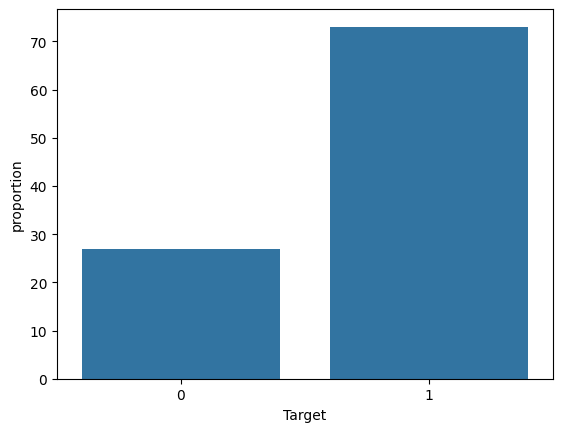

In [110]:

sns.barplot(x=df1['Target'].value_counts().index,y=df1['Target'].value_counts(normalize=True)*100)
#70% churn

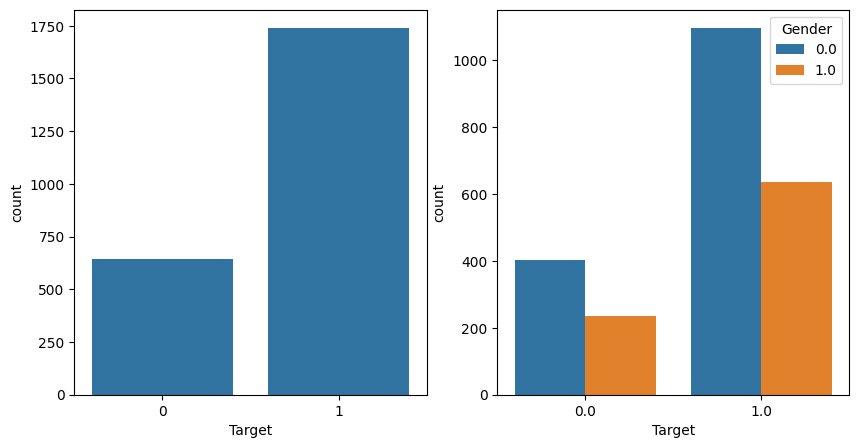

In [111]:
fig=plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x=df1['Target'])
plt.subplot(1,2,2)
plot=sns.countplot(x=df1['Target'],hue=df["Gender"])

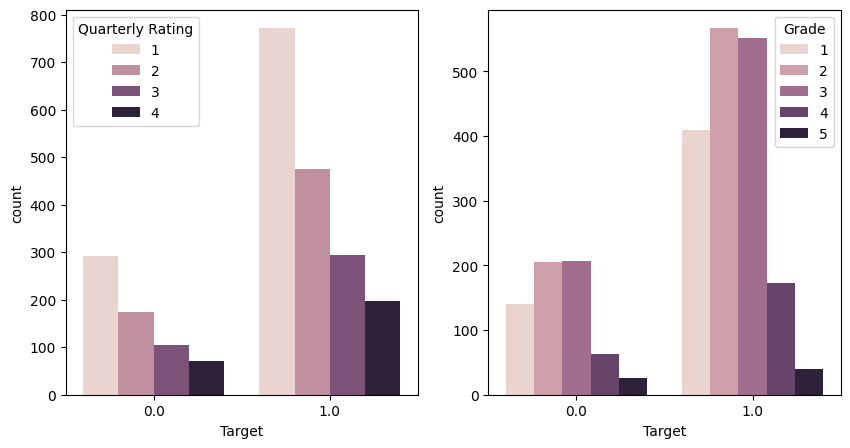

In [112]:
fig=plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x=df1['Target'],hue=df["Quarterly Rating"])
plt.subplot(1,2,2)
plot=sns.countplot(x=df1['Target'],hue=df["Grade"])
#Quarterly_rating 1 and Grade 2,3 have more probablity of churn

<Axes: xlabel='Age', ylabel='Count'>

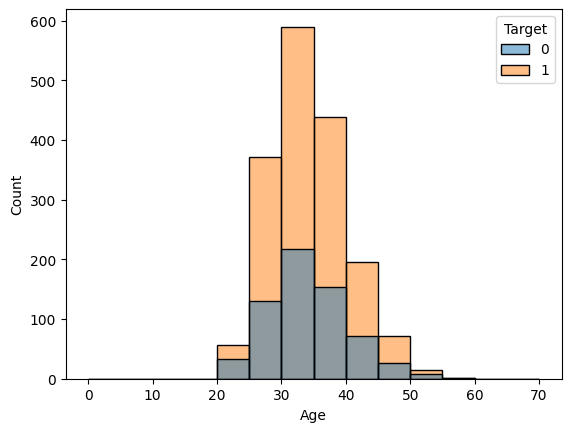

In [113]:
sns.histplot(x=df1["Age"],bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70],hue=df1['Target'])
#30-40 age grp have more probablity of churn

<Axes: xlabel='Income'>

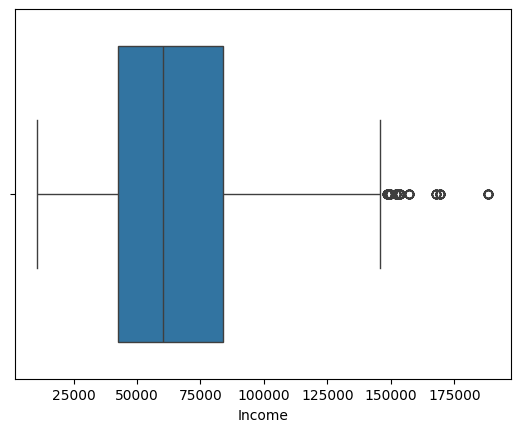

In [114]:
sns.boxplot(x=df["Income"])


<Axes: xlabel='Income', ylabel='Count'>

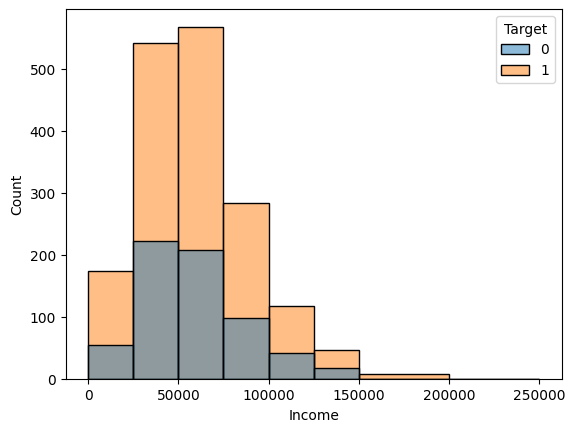

In [115]:
sns.histplot(x=df1["Income"],bins=[0,25000,50000,75000,100000,125000,150000,200000,250000],hue=df1['Target'])
#50k to 75k income range have more probablity of churn

([0, 1], [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

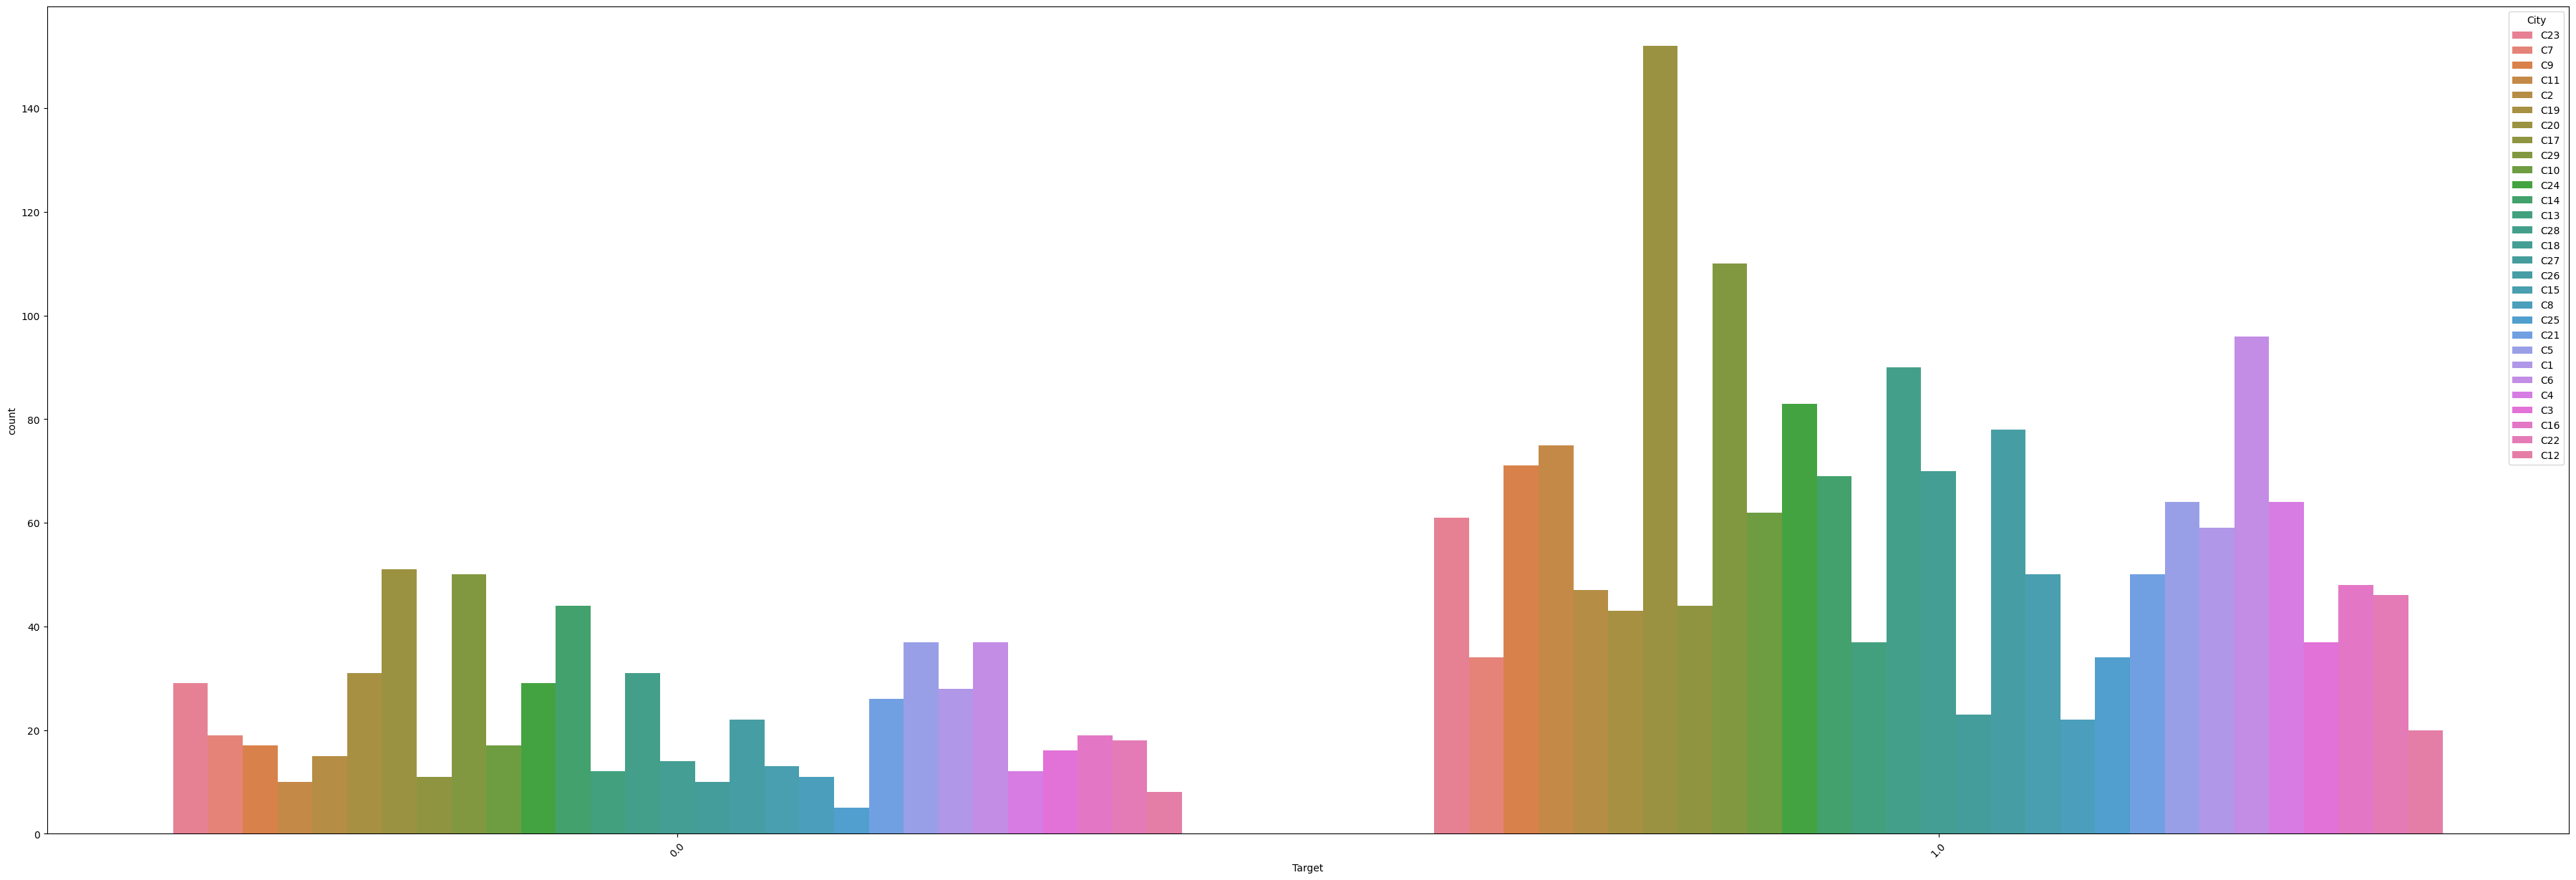

In [116]:
fig = plt.figure(figsize=(100,15))
plt.subplot(1,2,2)
plot=sns.countplot(x=df1['Target'],hue=df["City"])
plt.xticks(rotation=45)

#One Hot Encoding

In [117]:
df1 = pd.concat([df1,pd.get_dummies(df1['City'])],axis=1)

In [118]:
#Feature Variables
X = df1.drop(['Driver_ID','Target','City'],axis=1)
X_cols=X.columns
 # MinMaxScaler
scaler = MinMaxScaler()
 #Mathematically learning the distribution
X=scaler.fit_transform(X)

In [119]:
X=pd.DataFrame(X)

In [120]:
X.columns=X_cols

In [121]:
X

,Age,Gender,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,Income_Increased,...,C27,C28,C29,C3,C4,C5,C6,C7,C8,C9
0,0.189189,0.0,1.0,0.262508,0.00,0.00,0.032064,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.270270,0.0,1.0,0.316703,0.25,0.25,0.014326,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.594595,0.0,1.0,0.308750,0.25,0.25,0.017944,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.216216,0.0,0.0,0.200489,0.00,0.00,0.015570,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.270270,1.0,0.5,0.382623,0.50,0.50,0.027405,0.333333,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0.351351,0.0,0.0,0.405626,0.25,0.50,0.239197,1.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2377,0.351351,1.0,0.0,0.007643,0.00,0.00,0.014326,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2378,0.648649,0.0,0.0,0.138588,0.25,0.25,0.043432,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2379,0.189189,1.0,1.0,0.330673,0.00,0.00,0.024436,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
df1

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,...,C27,C28,C29,C3,C4,C5,C6,C7,C8,C9
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,...,False,False,False,False,False,False,False,False,False,False
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,...,False,False,False,False,False,False,False,True,False,False
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,...,False,False,False,False,False,False,False,False,False,False
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0,...,False,False,False,False,False,False,False,False,False,True
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0.0,82815.0,2.0,3.0,21748820.0,4.0,...,False,False,False,False,False,False,False,False,False,False
2377,2785,34.0,1.0,C9,0.0,12105.0,1.0,1.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,True
2378,2786,45.0,0.0,C19,0.0,35370.0,2.0,2.0,2815090.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2379,2787,28.0,1.0,C20,2.0,69498.0,1.0,1.0,977830.0,1.0,...,False,False,False,False,False,False,False,False,False,False


In [123]:
df1['Target'].value_counts()
# Out of 2381 drivers, 1616 drivers have left the organization.

Target
1    1739
0     642
Name: count, dtype: int64

In [124]:
df1['Target'].value_counts(normalize=True)*100


Target
1    73.036539
0    26.963461
Name: proportion, dtype: float64

In [125]:
 #Target Variable
y = df1['Target']
 # split into 80:20 ration


In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,precision_score,f1_score,roc_curve,auc
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split,GridSearchCV


In [127]:
A=ADASYN()
X,y=A.fit_resample(X,y)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [129]:
RFC=RandomForestClassifier(n_estimators=125,max_depth=75)
model=RFC.fit(X_train,y_train)

In [130]:
y_predict=model.predict(X_test)

In [131]:
confusion_matrix(y_test,y_predict)

array([[230, 106],
       [ 37, 310]])

In [132]:
f1_score(y_test, y_predict)

0.8125819134993448

In [133]:
param_grid={
    'n_estimators' :[30,70,120,125,130,200],
    'max_depth' :[4,10,30,50,70,75,80]

}

In [134]:
rfc_h = GridSearchCV(model, param_grid, cv=5)

In [135]:
rfc_h.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=75, n_estimators=125),
             param_grid={'max_depth': [4, 10, 30, 50, 70, 75, 80],
                         'n_estimators': [30, 70, 120, 125, 130, 200]})

In [136]:
print("Tuned Logistic Regression Parameters: {}".format(rfc_h.best_params_))
print("Best score is {}".format(rfc_h.best_score_))

Tuned Logistic Regression Parameters: {'max_depth': 75, 'n_estimators': 120}
Best score is 0.7816849816849817


In [137]:
RFC=RandomForestClassifier(n_estimators=200,max_depth=50)
model=RFC.fit(X_train,y_train)

In [138]:
y_predict=model.predict(X_test)

In [139]:
cfc_report=classification_report(y_test,y_predict)

In [140]:
print(cfc_report)

              precision    recall  f1-score   support

           0       0.85      0.68      0.76       336
           1       0.74      0.88      0.80       347

    accuracy                           0.78       683
   macro avg       0.79      0.78      0.78       683
weighted avg       0.79      0.78      0.78       683

